In [4]:
import os

# Set variabel lingkungan OMP_NUM_THREADS sebelum menjalankan KMeans
os.environ['OMP_NUM_THREADS'] = '2'

# Sisanya kode Anda
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca data dari file CSV
data = pd.read_csv('heart.csv')


X = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal',]]
# Normalisasi pada subset fitur yang dipilih
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:

# Pilih kolom yang akan digunakan untuk clustering

# Mengambil data ke-166 sebagai pusat atau acuan untuk klaster
acuan_1 = X.iloc[165]  # Data ke-166 (indeks dimulai dari 0)
acuan_2 = X.iloc[302]  # Data ke-166 (indeks dimulai dari 0)

# Inisialisasi pusat klaster menggunakan data ke-166
centroids = [acuan_1.values, acuan_2.values]  

# Inisialisasi dan melatih model K-Means dengan pusat yang telah ditentukan
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1)
kmeans.fit(X_scaled)


KMeans(init=[array([ 57.,   1.,   4., 132., 207.,   0.,   0., 168.,   1.,   0.,   1.,
         0.,   7.]),
             array([ 38.       ,   1.       ,   3.       , 138.       , 175.       ,
         0.       ,   0.       , 173.       ,   0.       ,   0.       ,
         1.       ,   0.6722408,   3.       ])],
       n_clusters=2, n_init=1)

In [8]:
data_baru = pd.DataFrame({'age': [2.3], 'sex': [1.0], 'cp': [0.0], 'trestbps': [33], 'chol': [3.3],
                          'fbs': [0.0], 'restecg': [1.0], 'thalach': [4.2], 'exang': [0.0],
                          'oldpeak': [2.3], 'slope': [0.0], 'ca': [0], 'thal': [0]})

# Standardize the new data
data_baru_scaled = scaler.transform(data_baru)

# Make predictions for the new data
prediksi_kmeans = kmeans.predict(data_baru_scaled)

# Display the prediction results
print("Hasil prediksi K-Means:", prediksi_kmeans)

Hasil prediksi K-Means: [1]


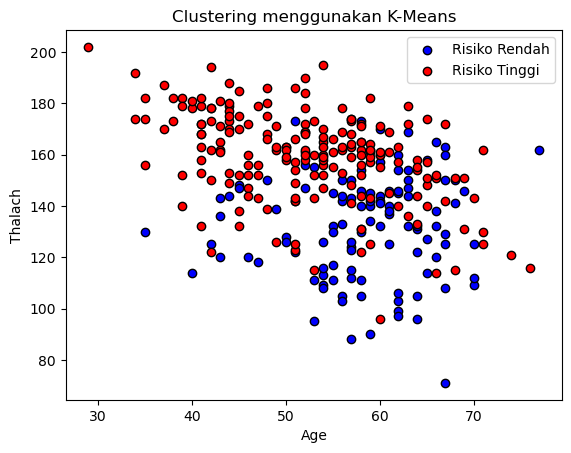

In [10]:
import matplotlib.pyplot as plt


# Menggunakan kmeans.labels_ untuk mendapatkan label klaster dari data yang telah dilatih
labels = kmeans.labels_

# Menambahkan kolom 'cluster' ke data asli
data['cluster'] = labels
labels = data['cluster'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0['age'], cluster_0['thalach'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1['age'], cluster_1['thalach'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan K-Means')
plt.xlabel('Age')
plt.ylabel('Thalach')

plt.legend()
plt.show()

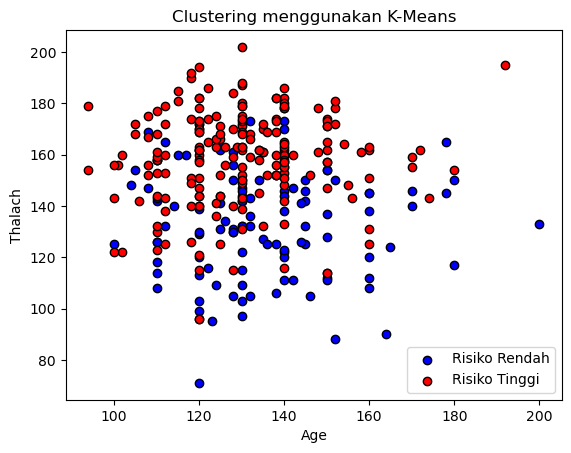

In [12]:
import matplotlib.pyplot as plt

# Menggunakan kmeans.labels_ untuk mendapatkan label klaster dari data yang telah dilatih
labels = kmeans.labels_

# Menambahkan kolom 'cluster' ke data asli
data['cluster'] = labels
labels = data['cluster'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0['trestbps'], cluster_0['thalach'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1['trestbps'], cluster_1['thalach'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan K-Means')
plt.xlabel('Age')
plt.ylabel('Thalach')

plt.legend()
plt.show()

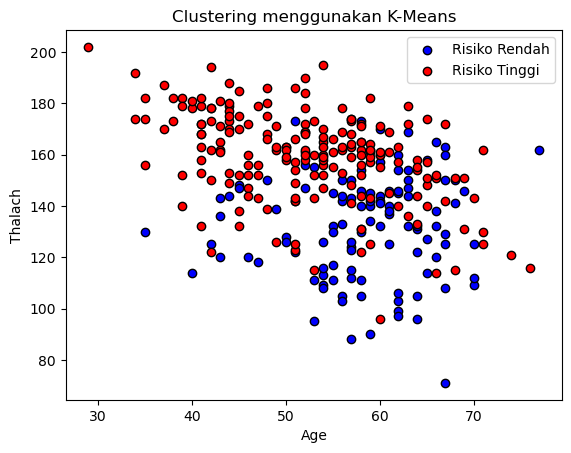

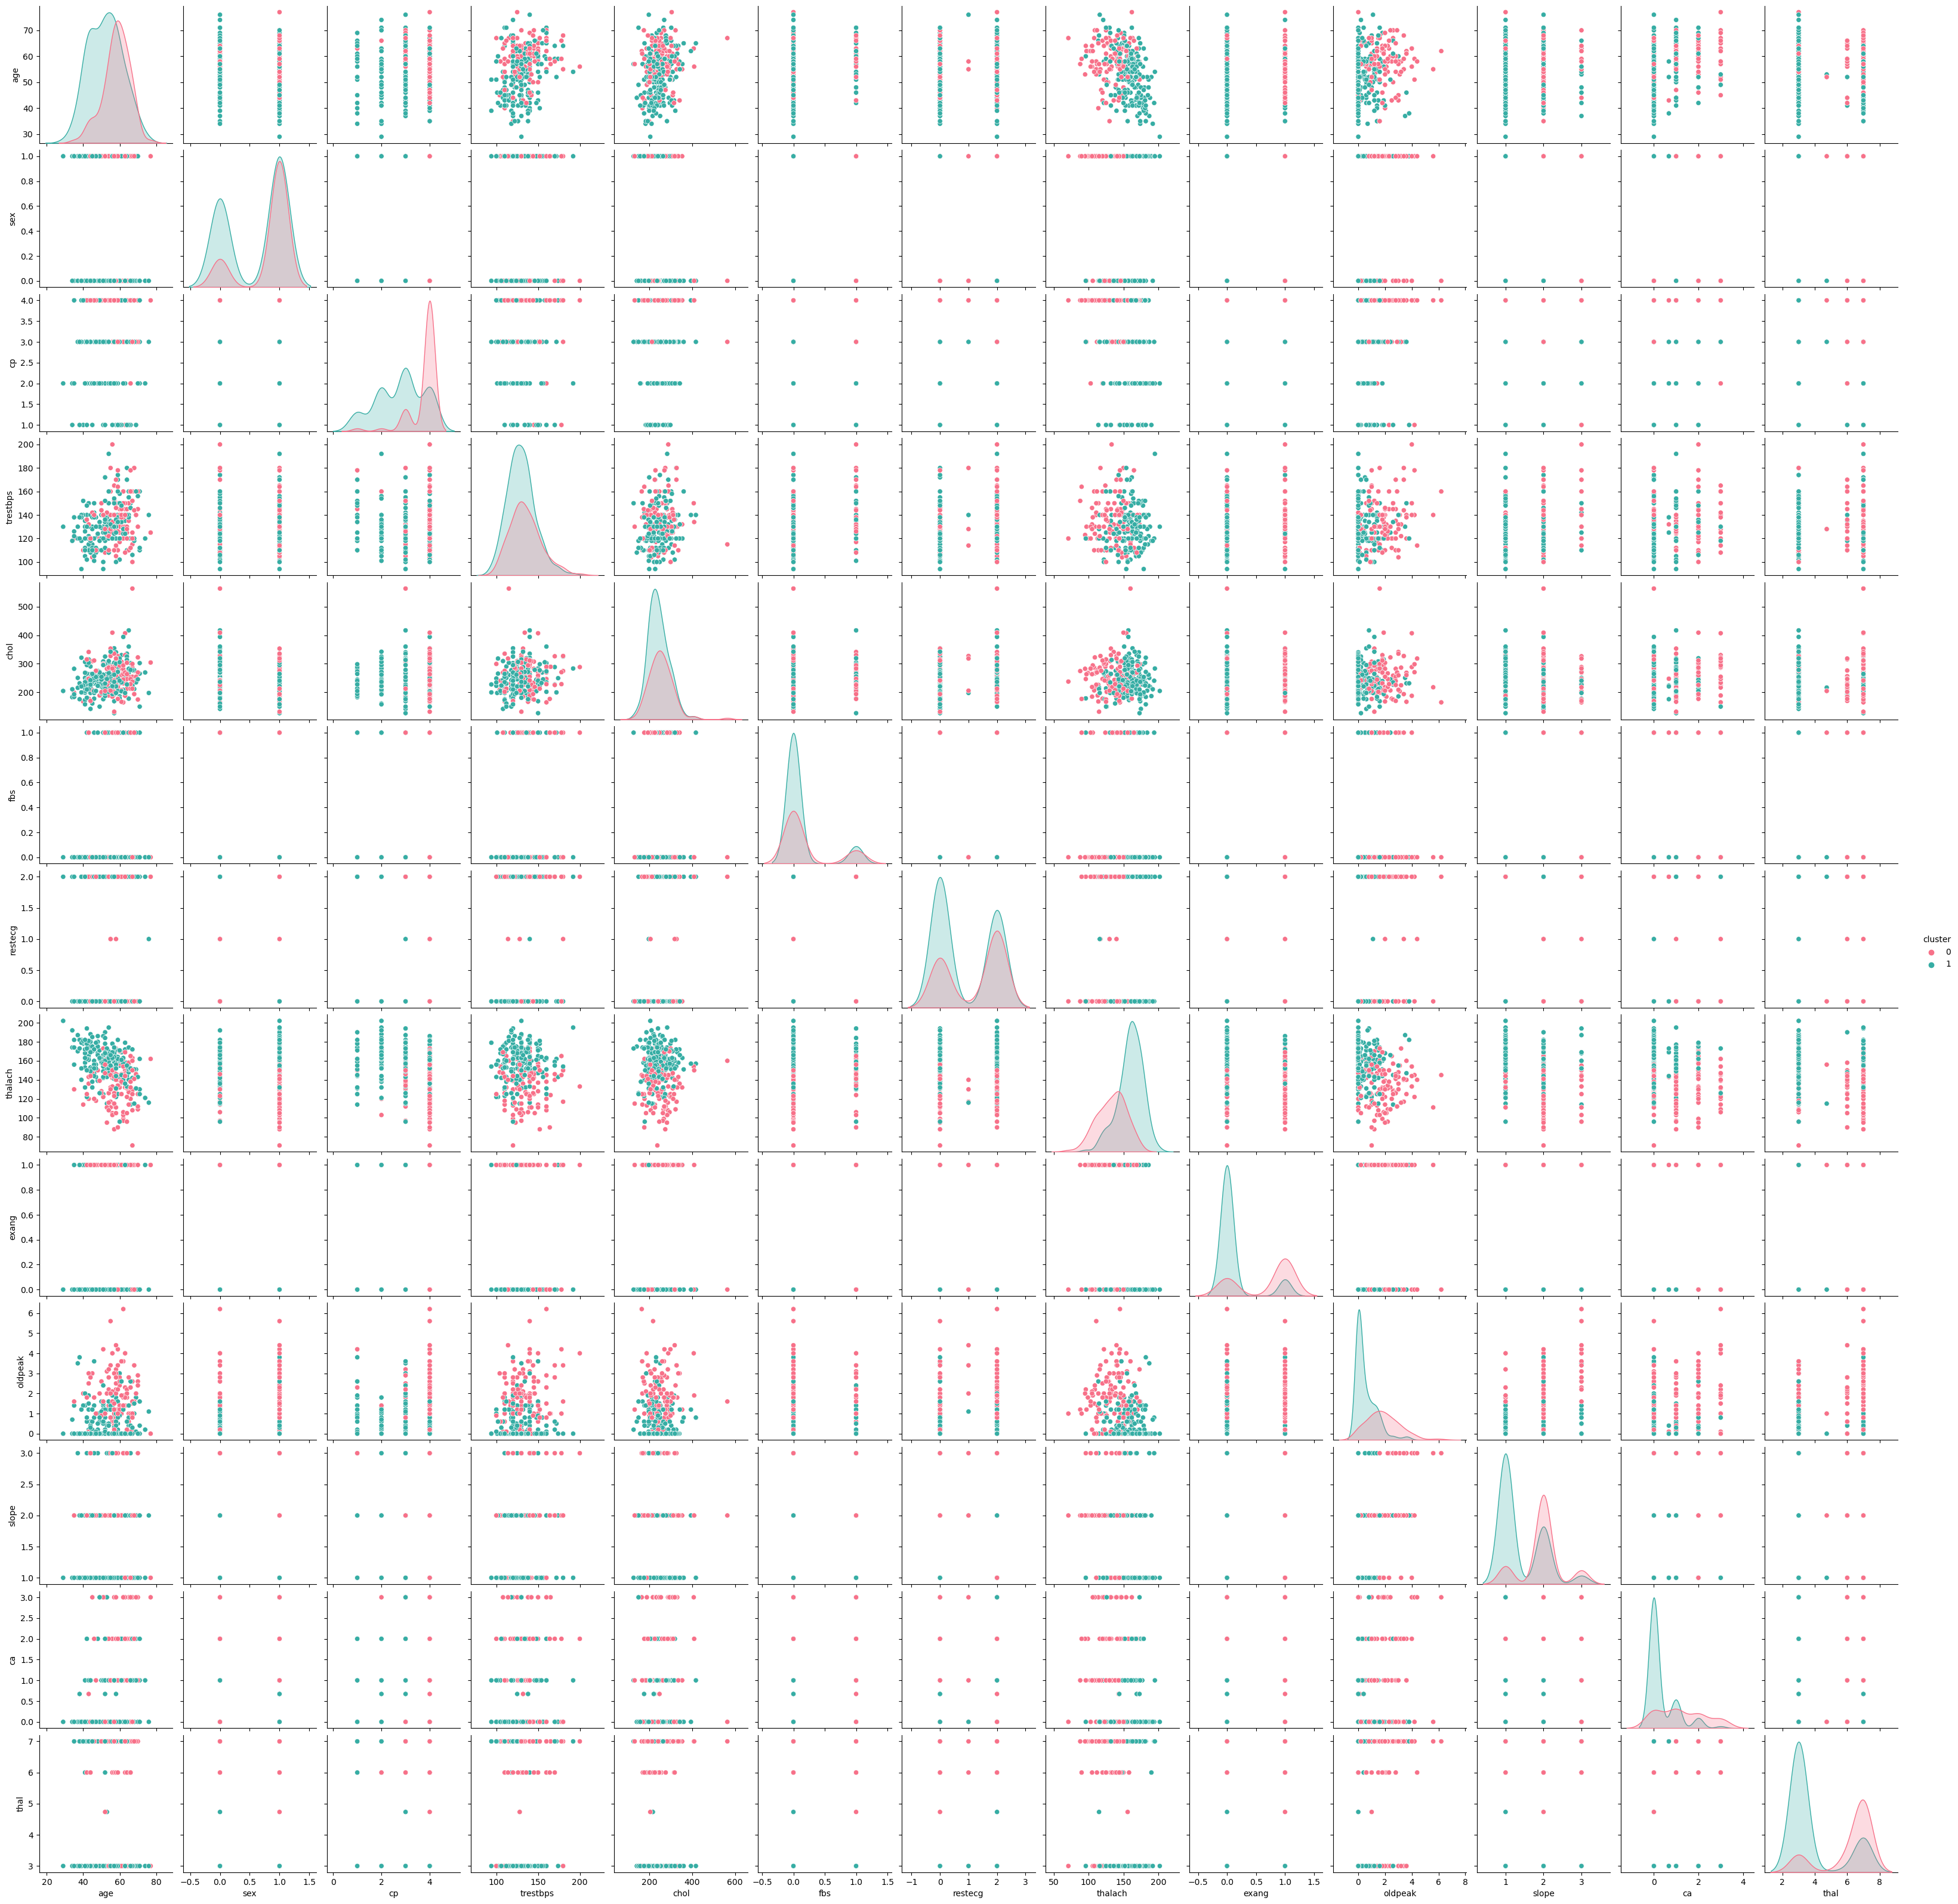

In [13]:
import seaborn as sns
labels = kmeans.labels_
data['cluster'] = labels
labels = data['cluster'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

plt.scatter(cluster_0['age'], cluster_0['thalach'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1['age'], cluster_1['thalach'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan K-Means')
plt.xlabel('Age')
plt.ylabel('Thalach')

plt.legend()

# Menampilkan pair plot untuk visualisasi fitur-fitur dalam satu plot
sns.pairplot(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'cluster']], hue='cluster', palette='husl')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.08812386062445522
